In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import plot_tree
import pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv("data/data/train_data_final_50k.csv", header = None)

In [3]:
def get_train_test(data,max_id):
    train_data = data[data[0]<max_id]
    test_data = data[data[0]>=max(max_id,500)]
    train_labels = train_data[622]
    test_labels = test_data[622]
    #print("here")
    train_features_18 = train_data[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
    test_features_18 = test_data[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
    print(train_data.shape)
    print(test_data.shape)
    return train_features_18,test_features_18,train_labels,test_labels

In [4]:
train_features_18,test_features_18,train_labels,test_labels = get_train_test(data, 200)

(19678, 623)
(7080, 623)


(19678, 623)
(7080, 623)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Original ROC area: 0.854
Confidence interval for the score: [0.844 - 0.862]
(27461, 623)
(7080, 623)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Original ROC area: 0.852
Confidence interval for the score: [0.843 - 0.861]
(29835, 623)
(7080, 623)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Original ROC area: 0.851
Confidence interval for the score: [0.842 - 0.861]
(37210, 623)
(7080, 623)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Original ROC area: 0.871
Confidence interval for the score: [0.862 - 0.878]
(42507, 623)
(7080, 623)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Original ROC area: 0.867
Confidence interval for the score: [0.858 - 0.875]
(42920, 623)
(7080, 623)


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


Original ROC area: 0.865
Confidence interval for the score: [0.856 - 0.873]


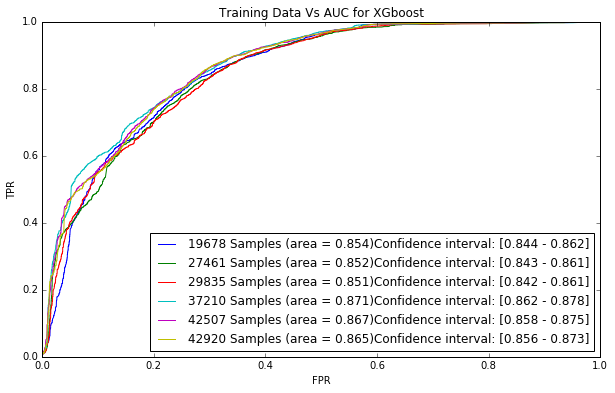

In [7]:
max_ids = [200,300,350,400,450,500]
plt.figure(figsize=(10,6))
plt.title("Training Data Vs AUC for XGboost")
plt.xlabel("FPR")
plt.ylabel("TPR")
max_auc_num = float("-inf")
best_model = 0 
import _pickle as pickle
for max_id in max_ids:
    train_features,test_features,train_labels,test_labels = get_train_test(data, max_id)
    train_features = train_features.as_matrix()
    test_features = test_features.as_matrix()
    train_labels = train_labels.as_matrix()
    test_labels = test_labels.as_matrix()
    model = XGBClassifier()
    model.fit(train_features,train_labels)
    test_preds = model.predict(test_features)
    test_preds_probs = model.predict_proba(test_features)
    fpr,tpr,thresholds = roc_curve(test_labels, test_preds_probs[:,1])
    #plot_tree(model)
    auc_num = auc(fpr, tpr)
    print("Original ROC area: {:0.3f}".format(roc_auc_score(test_labels, test_preds_probs[:,1])))
    if auc_num > max_auc_num:
        best_model = model
        max_auc_num = auc_num
    
    n_bootstraps = 100
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    
    y_true = np.array(test_labels)
    y_pred = test_preds_probs[:,1]
    
    #print(y_pred.shape)
    #print(y_true.shape)
    

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        #print(y_true)
        #print(y_pred)
        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    #print("Accuracy for data = " + str(train_features.shape[0])+ " = "+str(accuracy_score(test_labels,test_preds)))
    #print("AUC for data = " + str(train_features.shape[0])+ " = " + str(auc_num))
    plt.plot(fpr, tpr, label=str(train_features.shape[0]) + " Samples "+'(area = {:.3f})'.format(auc_num) + "Confidence interval: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
plt.legend(loc='best')
plt.show()
pickle.dump(best_model, open("best_xgboost_18_model.pickle", "wb"))

(19678, 623)
(7080, 623)
Accuracy for data = 19678 = 0.668361581920904
AUC for data = 19678 = 0.6788112776527686
(27461, 623)
(7080, 623)
Accuracy for data = 27461 = 0.6779661016949152
AUC for data = 27461 = 0.6840150201744885
(29835, 623)
(7080, 623)
Accuracy for data = 29835 = 0.6959039548022599
AUC for data = 29835 = 0.7025263379889679
(37210, 623)
(7080, 623)
Accuracy for data = 37210 = 0.7137005649717514
AUC for data = 37210 = 0.7183601146388995
(42507, 623)
(7080, 623)
Accuracy for data = 42507 = 0.6991525423728814
AUC for data = 42507 = 0.7032870154222737
(42920, 623)
(7080, 623)
Accuracy for data = 42920 = 0.6954802259887005
AUC for data = 42920 = 0.6997565301760565
(47512, 623)
(2488, 623)
Accuracy for data = 47512 = 0.7443729903536977
AUC for data = 47512 = 0.7448564144374992
(48850, 623)
(1150, 623)
Accuracy for data = 48850 = 0.7017391304347826
AUC for data = 48850 = 0.7285717113924551


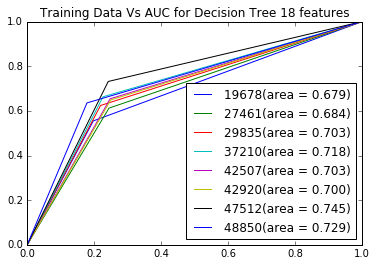

In [8]:
max_ids = [200,300,350,400,450,500,550,650]
plt.title("Training Data Vs AUC for Decision Tree 18 features")
for max_id in max_ids:
    train_features,test_features,train_labels,test_labels = get_train_test(data, max_id)
    train_features = train_features.as_matrix()
    test_features = test_features.as_matrix()
    train_labels = train_labels.as_matrix()
    test_labels = test_labels.as_matrix()
    model = DecisionTreeClassifier(random_state = 42)
    model.fit(train_features,train_labels)
    test_preds = model.predict(test_features)
    test_preds_probs = model.predict_proba(test_features)
    fpr,tpr,thresholds = roc_curve(test_labels, test_preds_probs[:,1])
    auc_num = auc(fpr, tpr)

    print("Accuracy for data = " + str(train_features.shape[0])+ " = "+str(accuracy_score(test_labels,test_preds)))
    print("AUC for data = " + str(train_features.shape[0])+ " = " + str(auc_num))
    plt.plot(fpr, tpr, label=str(train_features.shape[0])+'(area = {:.3f})'.format(auc_num))
plt.legend(loc='best')
plt.show()

(19678, 623)
(7080, 623)
Original ROC area: 0.679
Confidence interval for the score: [0.669 - 0.686]


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:42: DeprecationWarning: This function is deprecated. Please call randint(0, 7079 + 1) instead


(27461, 623)
(7080, 623)
Original ROC area: 0.685
Confidence interval for the score: [0.672 - 0.698]
(29835, 623)
(7080, 623)
Original ROC area: 0.692
Confidence interval for the score: [0.682 - 0.702]
(37210, 623)
(7080, 623)
Original ROC area: 0.706
Confidence interval for the score: [0.696 - 0.717]
(42507, 623)
(7080, 623)
Original ROC area: 0.709
Confidence interval for the score: [0.700 - 0.719]
(42920, 623)
(7080, 623)
Original ROC area: 0.703
Confidence interval for the score: [0.694 - 0.711]


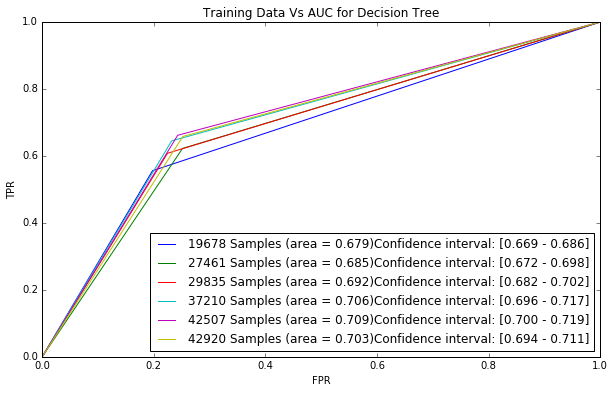

In [10]:
max_ids = [200,300,350,400,450,500]
plt.figure(figsize=(10,6))
plt.title("Training Data Vs AUC for Decision Tree")
plt.xlabel("FPR")
plt.ylabel("TPR")
max_auc_num = float("-inf")
best_model = 0 
for max_id in max_ids:
    train_features,test_features,train_labels,test_labels = get_train_test(data, max_id)
    train_features = train_features.as_matrix()
    test_features = test_features.as_matrix()
    train_labels = train_labels.as_matrix()
    test_labels = test_labels.as_matrix()
    model = DecisionTreeClassifier()
    model.fit(train_features,train_labels)
    test_preds = model.predict(test_features)
    test_preds_probs = model.predict_proba(test_features)
    fpr,tpr,thresholds = roc_curve(test_labels, test_preds_probs[:,1])
    
    #plot_tree(model)
    auc_num = auc(fpr, tpr)
    print("Original ROC area: {:0.3f}".format(roc_auc_score(test_labels, test_preds_probs[:,1])))
    
    if auc_num > max_auc_num:
        max_auc_num = auc_num
        best_model = model
    
    n_bootstraps = 100
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []
    
    y_true = np.array(test_labels)
    y_pred = test_preds_probs[:,1]
    
    #print(y_pred.shape)
    #print(y_true.shape)
    

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.random_integers(0, len(y_pred) - 1, len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue
        #print(y_true)
        #print(y_pred)
        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()

    # Computing the lower and upper bound of the 90% confidence interval
    # You can change the bounds percentiles to 0.025 and 0.975 to get
    # a 95% confidence interval instead.
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
    #print("Accuracy for data = " + str(train_features.shape[0])+ " = "+str(accuracy_score(test_labels,test_preds)))
    #print("AUC for data = " + str(train_features.shape[0])+ " = " + str(auc_num))
    plt.plot(fpr, tpr, label=str(train_features.shape[0]) + " Samples "+'(area = {:.3f})'.format(auc_num) + "Confidence interval: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))
plt.legend(loc='best')
plt.show()
pickle.dump(best_model, open("best_dtree_18_model.pickle", "wb"))